In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import os

In [264]:
df=pd.read_csv('Train_Dataset.csv')

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44262 entries, 0 to 44261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      44262 non-null  object
 1   is_sarcastic  44262 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 691.7+ KB


In [266]:
df.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


Target Class Distribution

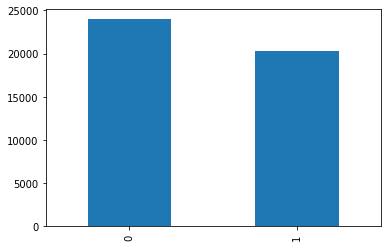

In [267]:
df['is_sarcastic'].value_counts().plot(kind='bar')

Some Text Preprocessing

In [268]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [299]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [269]:
from nltk.stem import WordNetLemmatizer

In [270]:
lemmatizer = WordNetLemmatizer()

In [328]:
def preprocess(row):
   # Decontracting words
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in row.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

     # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    # Lemmatize the sentence
    lemmatized_sentence=[]
    for word in q.split():
      lemmatized_sentence.append(lemmatizer.lemmatize(word))
    q=' '.join(lemmatized_sentence)


     # Remove digits
    q= re.sub(" \d+", " ", q)


    ## Remove Extra Space
    q= re.sub(' +', ' ', q)
    return q

In [329]:
df['headline']=df['headline'].apply(preprocess)

In [330]:
df.head(5)

,headline,is_sarcastic
0,supreme court vote to legalize all worlly vice,1
1,hungover man horrifie to learn he mae ozen of ...,1
2,emily s list founer woman are the problem solv...,0
3,sen your ki back to school with confience,0
4,watch expert talk pesticie an health,0


WordCloud

In [331]:
def wordCloud(_type,data):
  text = " ".join(text for text in data.headline)
  print (f"There are {len(text)} words in the combination of all {_type} headline.")

  # Generate a word cloud image
  wordcloud = WordCloud(background_color="white").generate(text)

  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

There are 1243487 words in the combination of all sarcastic headline.


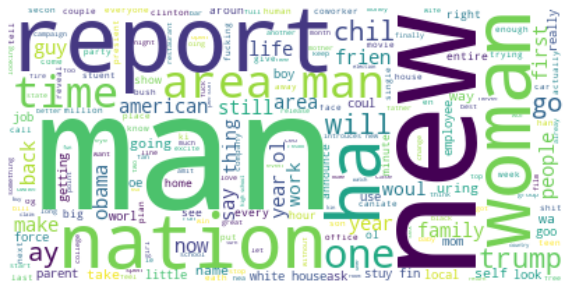

There are 1357209 words in the combination of all non sarcastic headline.


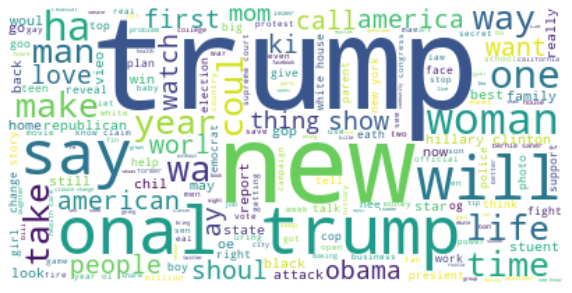

In [332]:
wordCloud('sarcastic',df[df['is_sarcastic']==1])
wordCloud('non sarcastic',df[df['is_sarcastic']==0])

Using Facebooks fasttext

In [333]:
!pip install fasttext

In [334]:
import fasttext

In [335]:
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)

In [336]:
all_texts = train['headline'].tolist()
all_labels = train['is_sarcastic'].tolist()
prep_datapoints=[]
for i in range(len(all_texts)):
    sample = '__label__'+ str(all_labels[i]) + ' '+ all_texts[i]
    prep_datapoints.append(sample)

In [337]:
prep_datapoints

['__label__0 paul lepage want to bring back the guillotine for rug trafficker',
 '__label__1 5 year ol want to be overworke haitian nanny when he grows up',
 '__label__1 gear of war crime court fin locust hore massacre justifie',
 '__label__0 tomi lahren s show reportely suspene from theblaze after pro choice remark',
 '__label__0 ifferent from the norm unique hotel stay in nyc',
 '__label__0 pope wrap up south american tour with visit to banao norte slum',
 '__label__1 inoor grill owner can not wait for start of autumn',
 '__label__0 the magic of toay s new unicorn leaer',
 '__label__1 kerry capture bin laen one week too late',
 '__label__1 bos able to seamlessly blen constructive criticism with personal attack',
 '__label__1 mom ha stacke inner party roster',
 '__label__1 teacher hoping stuent can tell he wa once popular',
 '__label__0 15 blog post by latino that got u talking in',
 '__label__1 entire treasury epartment competing for same golman sachs job opening',
 '__label__1 humbl

In [338]:
with open('train_fasttext.txt','w') as f:
    for datapoint in prep_datapoints:
        f.write(datapoint)
        f.write('\n')
    f.close()

In [339]:
model = fasttext.train_supervised('train_fasttext.txt',lr=0.1, epoch=50,wordNgrams=2)

In [340]:
print(model.words)

['</s>', 'to', 'of', 'the', 's', 'a', 'in', 'for', 'on', 'is', 'an', 'with', 'not', 'trump', 'new', 'man', 'from', 'at', 'it', 'you', 'about', 'by', 'this', 'are', 'after', 'woman', 'out', 'be', 'that', 'up', 'he', 'how', 'will', 'year', 'ha', 'u', 'i', 'what', 'your', 'report', 'say', 'can', 'who', 'his', 'all', 'one', 'have', 'ay', 'get', 'just', 'more', 'into', 'time', 'o', 'american', 'make', 'why', 'over', 'area', 'own', 'like', 'life', 'onal', 'first', 'no', 'her', 'people', 'obama', 'way', 'ol', 'off', 'worl', 'we', 'go', 'nation', 'house', 'now', 'show', 'white', 'back', 'still', 'thing', 'wa', 'they', 'family', 'clinton', 'take', 'chil', 'she', 'woul', 'than', 'fin', 'coul', 'if', 'my', 'state', 'when', 'want', 'right', 'know', 'mom', 'oe', 'their', 'school', 'before', 'boy', 'black', 'call', 'ki', 'him', 'nee', 'frien', 'stuy', 'most', 'shoul', 'gop', 'look', 'presient', 'being', 'home', 'love', 'so', 'parent', 'really', 'only', 'bill', 'best', 'star', 'change', 'last', 'here

In [341]:
print(model.labels)

['__label__0', '__label__1']


In [342]:
all_texts_test = test['headline'].tolist()

In [343]:
result=model.predict(all_texts_test)[0]

In [344]:
result=pd.DataFrame(result)

In [345]:
result.columns=['prediction']

In [346]:
result['pred']=result['prediction'].apply(lambda x: 0 if x=='__label__0' else 1)

In [347]:
result

,prediction,pred
0,__label__0,0
1,__label__0,0
2,__label__0,0
3,__label__0,0
4,__label__0,0
...,...,...
8847,__label__1,1
8848,__label__1,1
8849,__label__1,1
8850,__label__0,0


In [348]:
from sklearn.metrics import accuracy_score

In [349]:
accuracy_score(result['pred'],test['is_sarcastic'])

0.9452101220063263

Submission File

In [293]:
df_test=pd.read_csv('Test_Dataset.csv')

In [294]:
df_test.shape

(11066, 1)

In [324]:
df_test['headline']=df_test['headline'].apply(preprocess)

In [325]:
all_texts_test = df_test['headline'].tolist()

In [326]:
result=model.predict(all_texts_test)[0]
result=pd.DataFrame(result)
result.columns=['prediction']
result['prediction']=result['prediction'].apply(lambda x: 0 if x=='__label__0' else 1)
result.head()

,prediction
0,1
1,1
2,1
3,0
4,0


In [327]:
result.to_csv('prediction.csv')